# Machine Learning and Neural Networks; Lab 0

Goals of this lab:

- Go over the concepts learned in the previous theory class
- Get familiarized with the Python syntax
- Get a taste of the traditional machine learning paradigms
- See *small* examples of machine learning in action

## Why do we need machine learning?

- Solving tasks humans are unable to solve
- Help humans in tasks that could be difficult, time consuming or tiresome


In [4]:
# In this cell we are importing the Python libraries necessary for running the rest of the notebook

import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import numpy as np
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, adjusted_mutual_info_score
from sklearn.datasets import fetch_california_housing, load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.cluster import KMeans
from IPython.display import Image, IFrame

np.set_printoptions(threshold=60000)  # This line sets how many elements of a ndarray are printed

In [5]:
# This cell contains three visualization functions. You are not expected
# to understand them, even though you will need to use them in some of the
# exercises.

def visualize_MNIST(data, n):
    images = np.concatenate([np.concatenate([data[i+j] for i in np.arange(0, n, 1)], axis=1) for j in np.arange(0, n**2, n)], axis=0)
    fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    plt.imshow(images, cmap="Greys")
    plt.show()
    
def visualize_california(x_data, y_data, n):
    fig=plt.figure(figsize=(18, 6), dpi= 80, facecolor='w', edgecolor='k')
    for index, feature in enumerate(db.feature_names):
        plt.plot(x_data[:n, index], label=feature)
    plt.plot(y_data[:n], label="Price", linewidth=4)
    plt.legend()
    plt.show()
    
def visualize_iris(data, color=None, names=False):
    # Plot the ground truth
    fig = plt.figure(0, figsize=(8, 6))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    # Reorder the labels to have colors matching the cluster results
    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=color, edgecolor='k')

    #ax.w_xaxis.set_ticklabels([])
    #ax.w_yaxis.set_ticklabels([])
    #ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title('Ground Truth')
    
    if names:

        for label, name in enumerate(["Setosa", "Versicolor", "Virginica"]):
            ax.text3D(X[y == label, 3].mean(),
                      X[y == label, 0].mean(),
                      X[y == label, 2].mean() + 2, name,
                      horizontalalignment='center',
                      bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))

    ax.dist = 12

    fig.show()
    

In the following cell we are loading the data necessary for the next example, the MNIST database. This dataset consists of a collection of hand-written digits (with $28\times28=784$ pixels each), each of which belong to a class (in this case 0-9).

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


Here we show the shape of the databases. As you can see, the training part consists of a 3D matrix with $60.000$ examples of $28\times 28$ images, and one vector of $60.000$ labels. The testing part has similar characteristics, but with $10.000$ examples instead of $60.000$.

In [7]:
print("X train:", x_train.shape)
print("Y train:", y_train.shape)
print()
print("X test:", x_test.shape)
print("Y test:", y_test.shape)

X train: (60000, 28, 28)
Y train: (60000,)

X test: (10000, 28, 28)
Y test: (10000,)


In the following cell we can see the first 16 examples of the database:

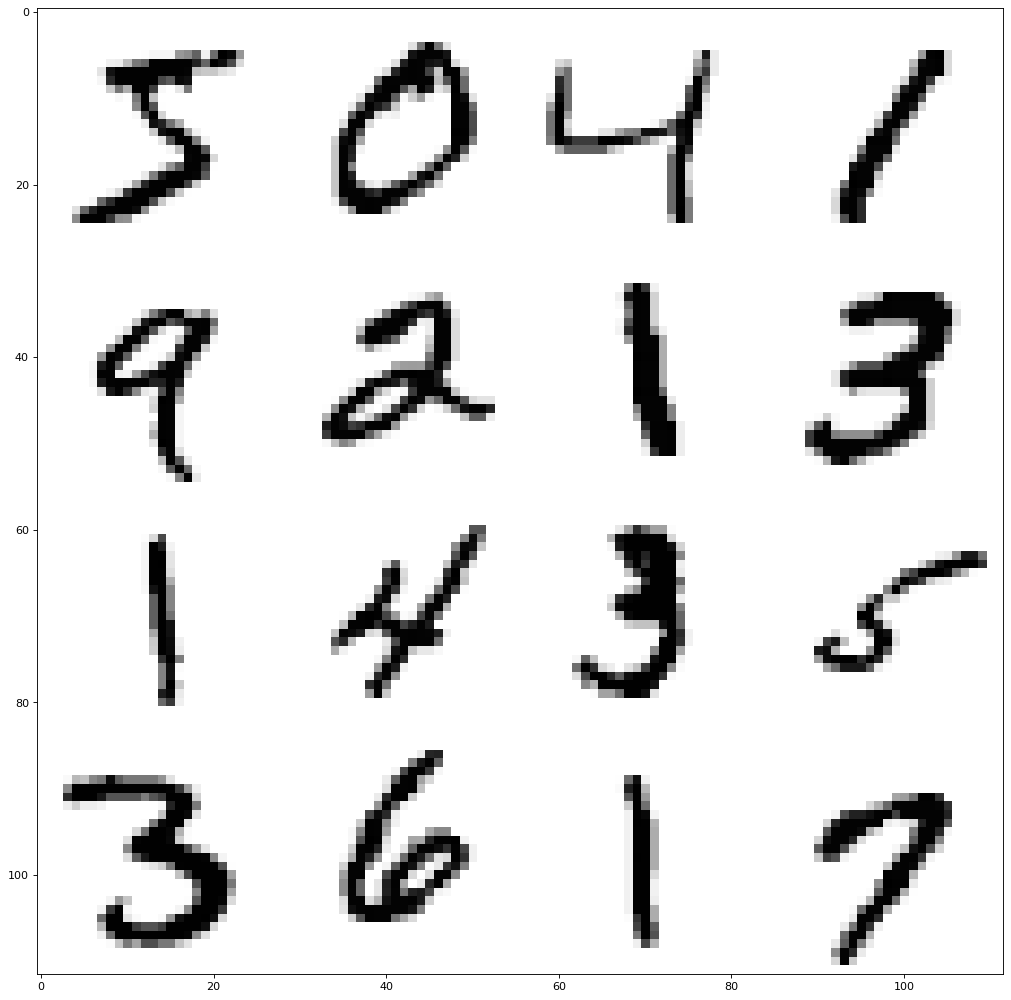

In [8]:
visualize_MNIST(x_train, 4)

## Think
Here we show all the labels assigned to the hand-written digits. Can you observe any pattern between the previous example and the labels printed here?

In [9]:
print(y_train)

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1 5 7 1 7 1 1 6 3 0 2 9
 3 1 1 0 4 9 2 0 0 2 0 2 7 1 8 6 4 1 6 3 4 5 9 1 3 3 8 5 4 7 7 4 2 8 5 8 6
 7 3 4 6 1 9 9 6 0 3 7 2 8 2 9 4 4 6 4 9 7 0 9 2 9 5 1 5 9 1 2 3 2 3 5 9 1
 7 6 2 8 2 2 5 0 7 4 9 7 8 3 2 1 1 8 3 6 1 0 3 1 0 0 1 7 2 7 3 0 4 6 5 2 6
 4 7 1 8 9 9 3 0 7 1 0 2 0 3 5 4 6 5 8 6 3 7 5 8 0 9 1 0 3 1 2 2 3 3 6 4 7
 5 0 6 2 7 9 8 5 9 2 1 1 4 4 5 6 4 1 2 5 3 9 3 9 0 5 9 6 5 7 4 1 3 4 0 4 8
 0 4 3 6 8 7 6 0 9 7 5 7 2 1 1 6 8 9 4 1 5 2 2 9 0 3 9 6 7 2 0 3 5 4 3 6 5
 8 9 5 4 7 4 2 7 3 4 8 9 1 9 2 8 7 9 1 8 7 4 1 3 1 1 0 2 3 9 4 9 2 1 6 8 4
 7 7 4 4 9 2 5 7 2 4 4 2 1 9 7 2 8 7 6 9 2 2 3 8 1 6 5 1 1 0 2 6 4 5 8 3 1
 5 1 9 2 7 4 4 4 8 1 5 8 9 5 6 7 9 9 3 7 0 9 0 6 6 2 3 9 0 7 5 4 8 0 9 4 1
 2 8 7 1 2 6 1 0 3 0 1 1 8 2 0 3 9 4 0 5 0 6 1 7 7 8 1 9 2 0 5 1 2 2 7 3 5
 4 9 7 1 8 3 9 6 0 3 1 1 

This is the whole part of the dataset set for learning:

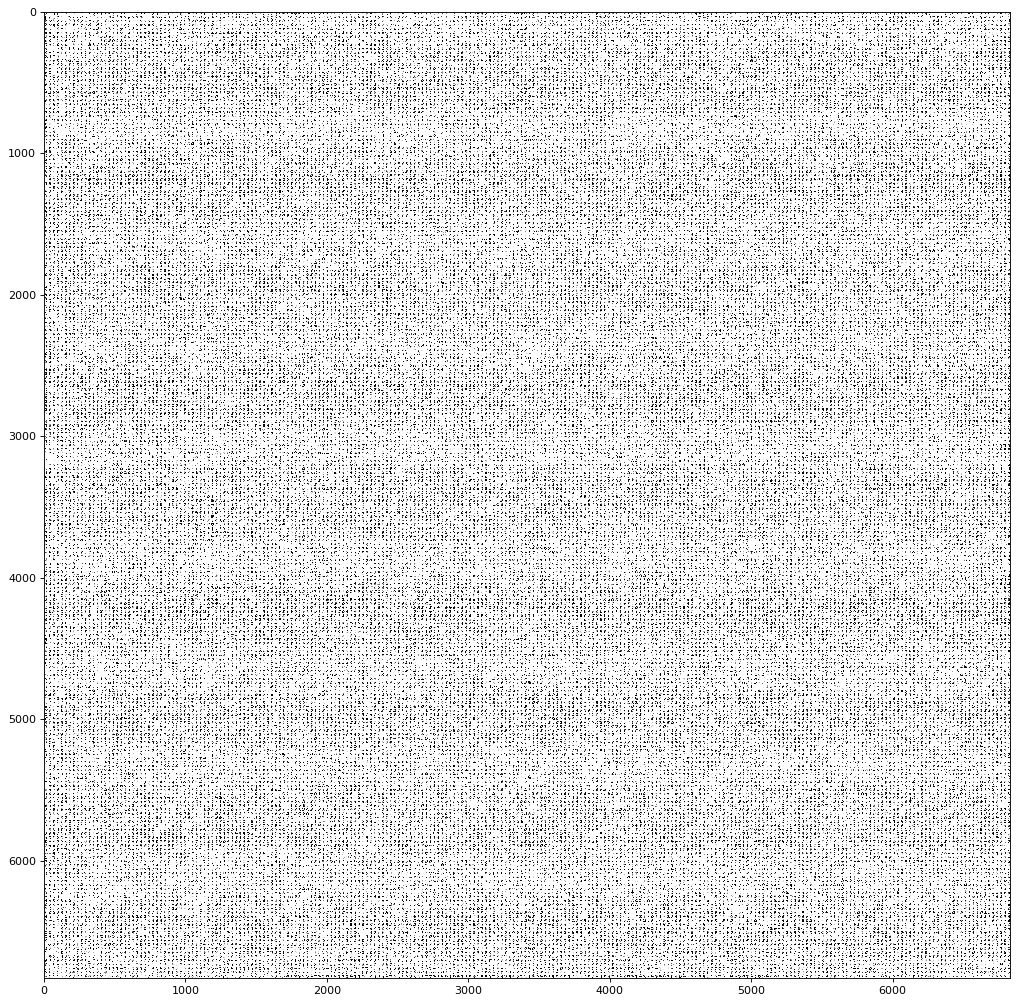

In [10]:
visualize_MNIST(x_train, 244)

Identifying each digit is a trivial task, as one can easily tell the digits written in the previous image. However, as the problem scales, the task becomes more and more unfeasible. For example, try to determine what digits the following $10.000$ characters of the test part are:

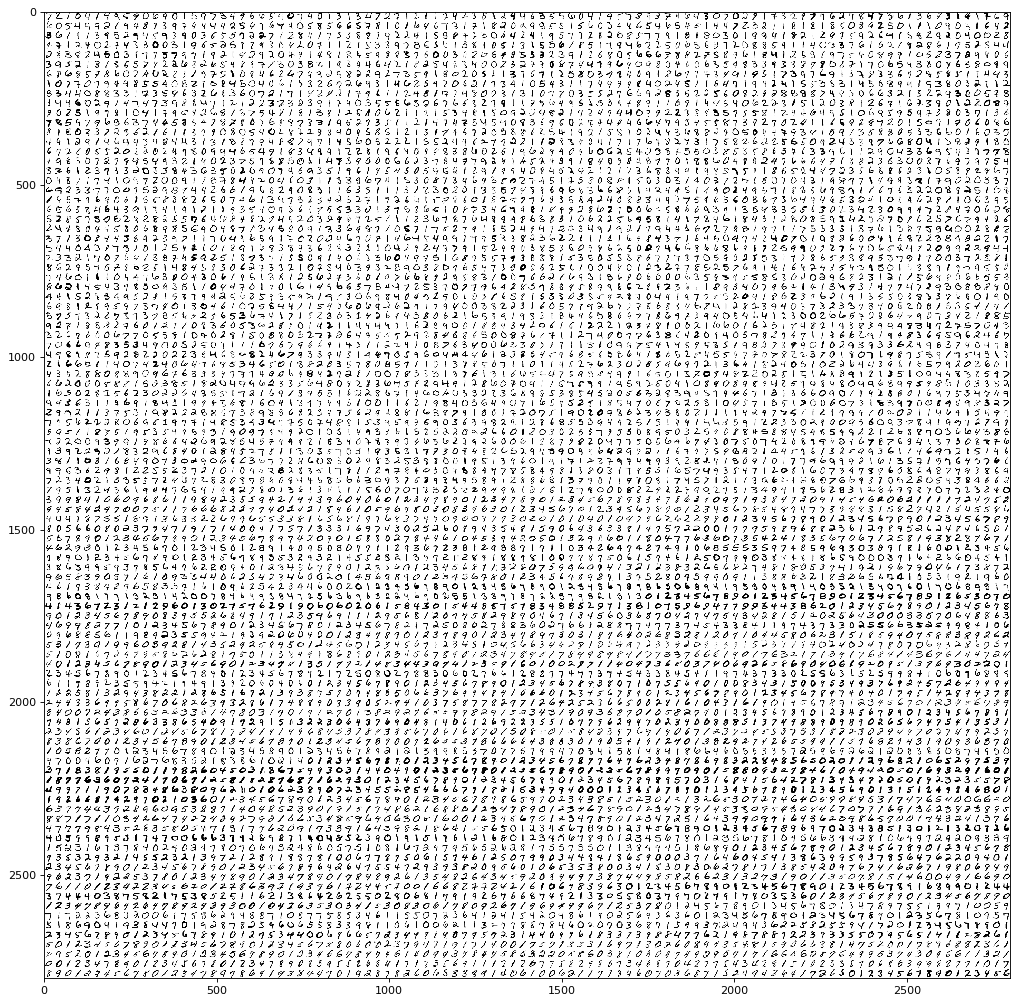

In [11]:
visualize_MNIST(x_test, 100)

This would result in a very tedious process, in which one should classify each digit manually, until all $10.000$ images are classified.

Furthermore, in this problem, you already know the relation between the images and the label: one can easily tell the difference between a 2 and an 8. For this reason one wouldn't need to go though the learning process of discovering the relation between the first images and the labels. This makes this problem considerably easier, but this is not always the case. Other problems in which the knowledge has not been acquired yet and needs to be built from the first image are very common.

## ML can help in this kind of scenarios by automatizing trivial tasks.

In the following cell, a Random Forest Classifier is declared. Next we are teaching the model to perform the task of classifying the hand-written digits.

In [12]:
clf = RandomForestClassifier(n_estimators=100, max_depth=10)
clf.fit(np.reshape(x_train, (x_train.shape[0], -1)), y_train)    

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Once the model has been learned, we can use it to classify the digits in the test partition:

In [13]:
prediction = clf.predict(np.reshape(x_test, (x_test.shape[0], -1)))

Let's see how the model does at the time of predicting the labels associated to the images.

In [14]:
print(prediction)

[7 2 1 0 4 1 4 9 9 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 9 4 6 4 3 0 7 0 2 8
 1 7 3 7 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9 6 0 5 4 9 9 2 1 9 4 8
 7 3 9 7 4 4 4 9 2 5 4 7 6 4 9 0 5 8 5 6 6 5 7 8 1 0 1 6 4 6 7 2 1 7 1 8 2
 0 2 9 9 5 5 1 5 6 0 3 4 4 6 5 4 6 5 4 5 1 4 4 7 2 3 2 7 1 8 1 8 1 8 5 0 8
 9 2 5 0 1 1 1 0 9 0 3 1 6 4 2 3 6 1 1 1 3 9 5 2 9 4 5 9 3 9 0 3 5 5 5 7 2
 8 7 1 2 8 4 1 7 3 3 8 9 7 9 2 2 4 1 5 8 8 7 2 5 0 2 4 2 4 1 9 5 7 7 2 8 2
 0 8 5 7 7 9 1 8 1 8 0 3 0 1 9 9 4 1 8 2 1 2 9 7 5 9 2 6 4 1 5 4 2 9 2 0 4
 0 0 2 8 4 7 1 2 4 0 2 7 4 3 3 0 0 5 1 9 6 5 2 5 1 7 9 3 0 4 2 0 7 1 1 2 1
 5 3 3 9 7 8 6 3 6 1 3 8 1 0 5 1 7 1 5 5 6 1 8 5 1 7 9 4 6 2 2 5 0 6 5 6 3
 7 2 0 8 8 5 9 1 1 4 0 7 3 7 6 1 6 2 1 9 2 8 6 1 9 5 2 5 4 4 2 8 3 9 2 4 5
 0 3 1 7 7 5 7 9 7 1 9 2 1 4 2 9 2 0 4 9 1 4 8 1 8 4 5 9 8 8 3 7 6 0 0 3 0
 2 0 6 4 8 5 3 3 2 3 9 1 2 6 8 0 5 6 6 6 3 8 8 2 7 5 8 9 6 1 8 4 1 2 5 3 1
 9 7 5 4 0 8 9 9 1 0 5 2 

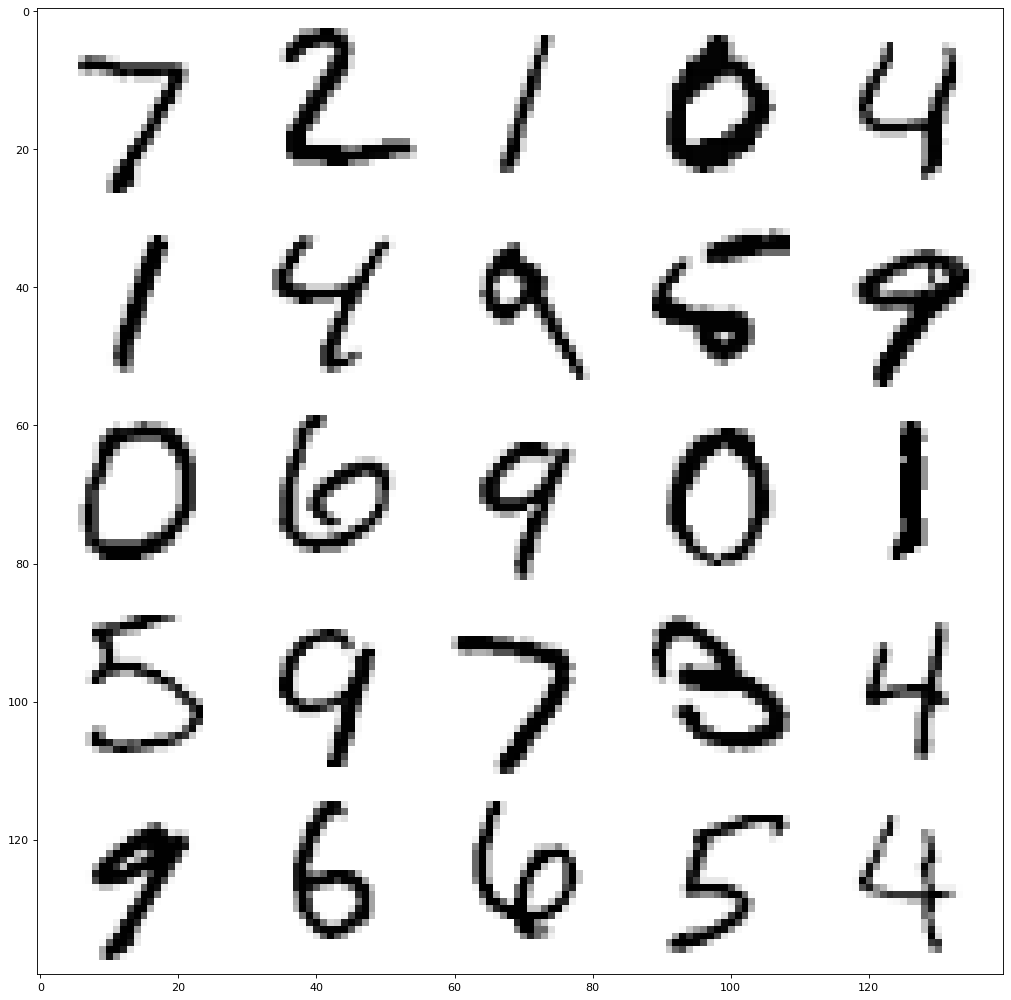

In [15]:
visualize_MNIST(x_test, 5)

Appart from determining the capacity of the model visually, we can compute metrics like the accuracy, which shows the proportion of examples the model predicted correctly.

In [16]:
accuracy_score(prediction, y_test)

0.9478

## Think

1- What accuracy did you obtain? 

2- Do you consider it good enough? 

3- How much time would the labeling task would have taken you, compared to the Random Forest Classifier? 

4- Think of one real-life scenario where the accuracy you obtained would be enough, and another one where it would not.

# Non-trivial tasks

Tasks that can result trivial to the majority of the population are not the only ones ML can help us with. Other problems that are *difficult* for anyone not expert in certain field can also be approached with ML. Lets see the following example:

In [17]:
# In this cell we are loading a database from the sklearn library. Then, we print its characteristics

db = fetch_california_housing()
print(db.DESCR)
print(db.feature_names)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

## Exercise:

Read the description of the database, understand the problem, and confirm that it contains the number of observations and variables the description says it contains.

In the following cell, we visualize $n=10$ examples of the database

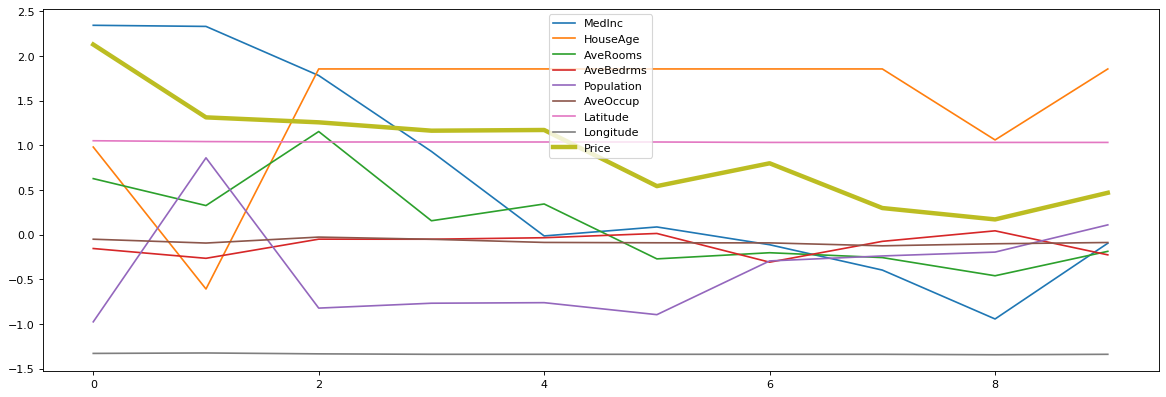

In [21]:
visualize_california(db.data, db.target, n=10)

## Think

Would you say this is an informative visualization of the data? What is the problem? How can we solve it?

One way to create more informative visualizations is to scale variables. When all the data has the same range, visualization tends to be much more informative:

In [19]:
db.data = scale(db.data)
db.target = scale(db.target)

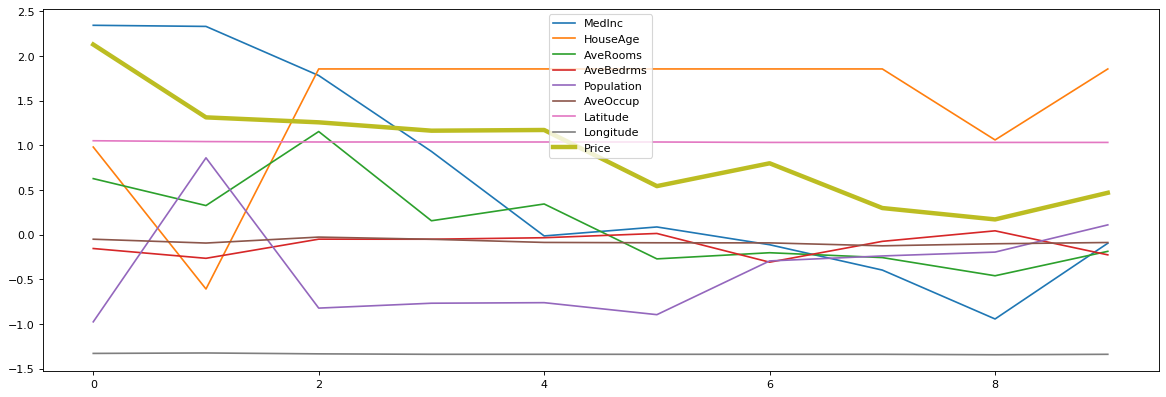

In [20]:
visualize_california(db.data, db.target, n=10)

## Think

Unlike the MNIST database, this one is not divided into train and test partitions. We will have to do it ourselves. What do you think would be the best way to divide it? Fill the "XXX" in the following cell

In [64]:
X_train, X_test, y_train, y_test = train_test_split(db.data, db.target, test_size=XXX, random_state=0)


In this case, predicting the price of a house is not that easy. But we can learn a similar model to the previous one:

In [65]:
regr = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=100)
regr.fit(X_train, y_train)  

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [66]:
pred = regr.predict(X_test)

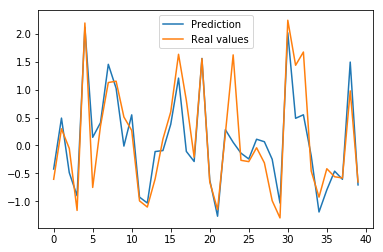

In [67]:
plt.plot(pred[:40], label="Prediction")
plt.plot(y_test[:40], label="Real values")
plt.legend()
plt.show()

## Think

Would you consider this a good prediction? Why? 

## Exercise

Try to use the mean_squared_error function as we did previously with the accuracy_score function

## Think

Is the mean squared error valuable for you? Why?

## Help us in difficult tasks

In many cases, it is helpful discovering paterns that remain latent in our data, which could lead up to interesting conclusions.
(This code is an adaptation of that found in https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

## Think

We load a new database. Read its description and understand what it is most useful for.

In [82]:
iris = load_iris()
X = iris.data
y = iris.target

print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

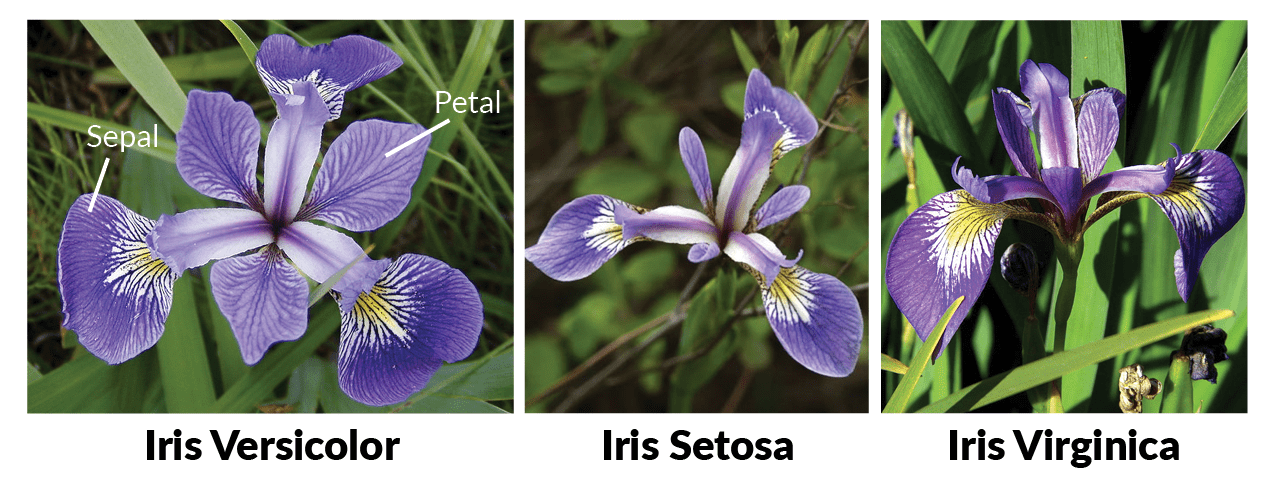

In [21]:
Image(filename='iris.png')

This database is intended for training classification model, as it has four variables and a class to be predicted. However, we are going to pretend we don't know that, and we are going to try to discover these classes by ourselves.

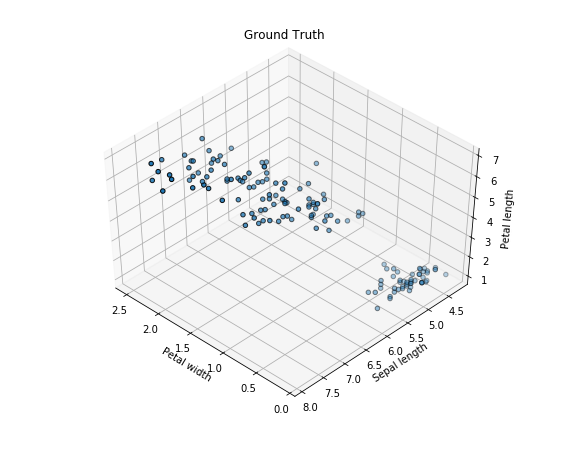

In [91]:
# Here we visualize three (3) of the four (4) present variables
visualize_iris(X)

## Think

Try to make a separation of two groups based on the image generated in the cell above.

However, if I asked you to differentiate three groups, things would change. It wouldn't be that easy anymore. Let's, once again, use a model to ease this task:

In [83]:
est = KMeans(n_clusters=3)
est.fit(X)
labels = est.labels_  # "labels" now contains the group each observation has been assigned to. Similar to the class

In [92]:
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


The KMeans algorithm is used to perform unsupervised learning, a paradigm in which we have no information about the value to be predicted. Note the difference between this problem and the two problems we have dealt with previously in this notebook.

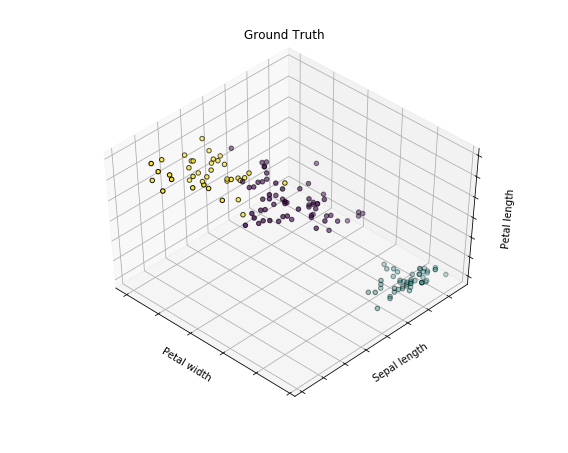

In [84]:
visualize_iris(X, labels.astype(np.float))

As can be seen, the algorithm has identified the group or cluster of flowers far from the other two. 

## Exercise

Use the adjusted_mutual_info_score function as previously done for accuracy_score and mean_square_error to compare the clustering performed by the KMeans algorithm

In [ ]:
adjusted_mutual_info_score()

Would you say the KMeans algorithm did a good job? Why?

## Exercise
Use the visualize_iris with the appropriate parameters for showing the same variables, but instead of showing the labels predicted by KMeans, show the real classes.
Tip: Identify the parameter that contains the "placement" data (Petal width, length, and Sepal length), and the color data. Change the parameter determining the color for another one containing the original classes of the data.

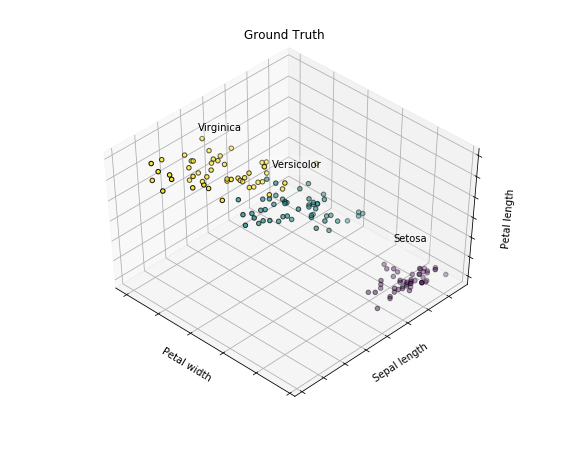

In [81]:
visualize_iris(_, _, True)

Although the algorithm made some mistakes, the separation of Virginica and Versicolor is considerably accurate.

## Replicate knowledge

To see a final application of machine learning, we are going to shift to generative modeling. This specific field is focused on learning from existing examples to create new examples, not present in the original data.

For example, a generative model can become a digit writer if we teach it with the database presented at the beginning of the notebook.

The following is an example of a model that has learned to generate hand-written digits:

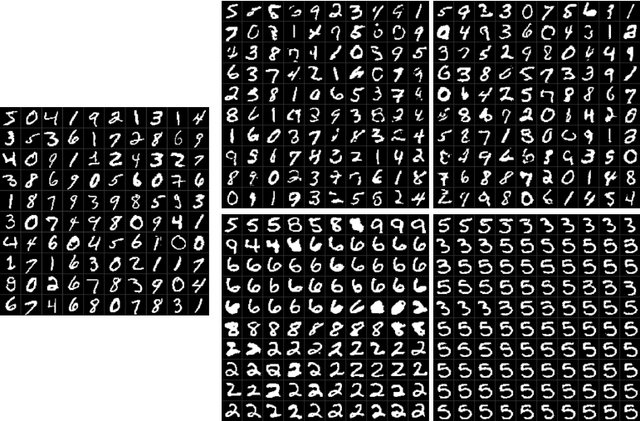

In [11]:
Image(filename='MNIST_gen.jpg')

Breuleux, O., Bengio, Y., & Vincent, P. (2011). Quickly generating representative samples from an rbm-derived process. Neural computation, 23(8), 2058-2073.

## Think
From the *artificial* data generated by a model (the four samples in the right) which generation would you say is the best one? Why?

However, we can train generative models to create any kind of image. By training a model with this:

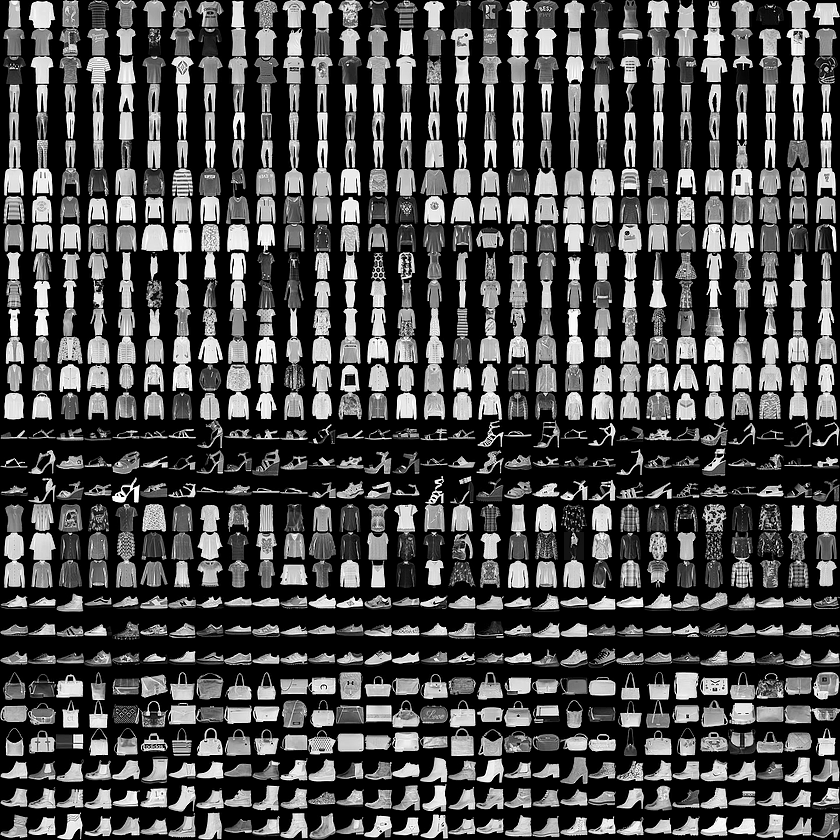

In [19]:
Image(filename='fashion-mnist-sprite.png')

We can generate samples like these:

In [76]:
IFrame("topExamples.pdf", width=900, height=950)

Or more complex things, like faces:

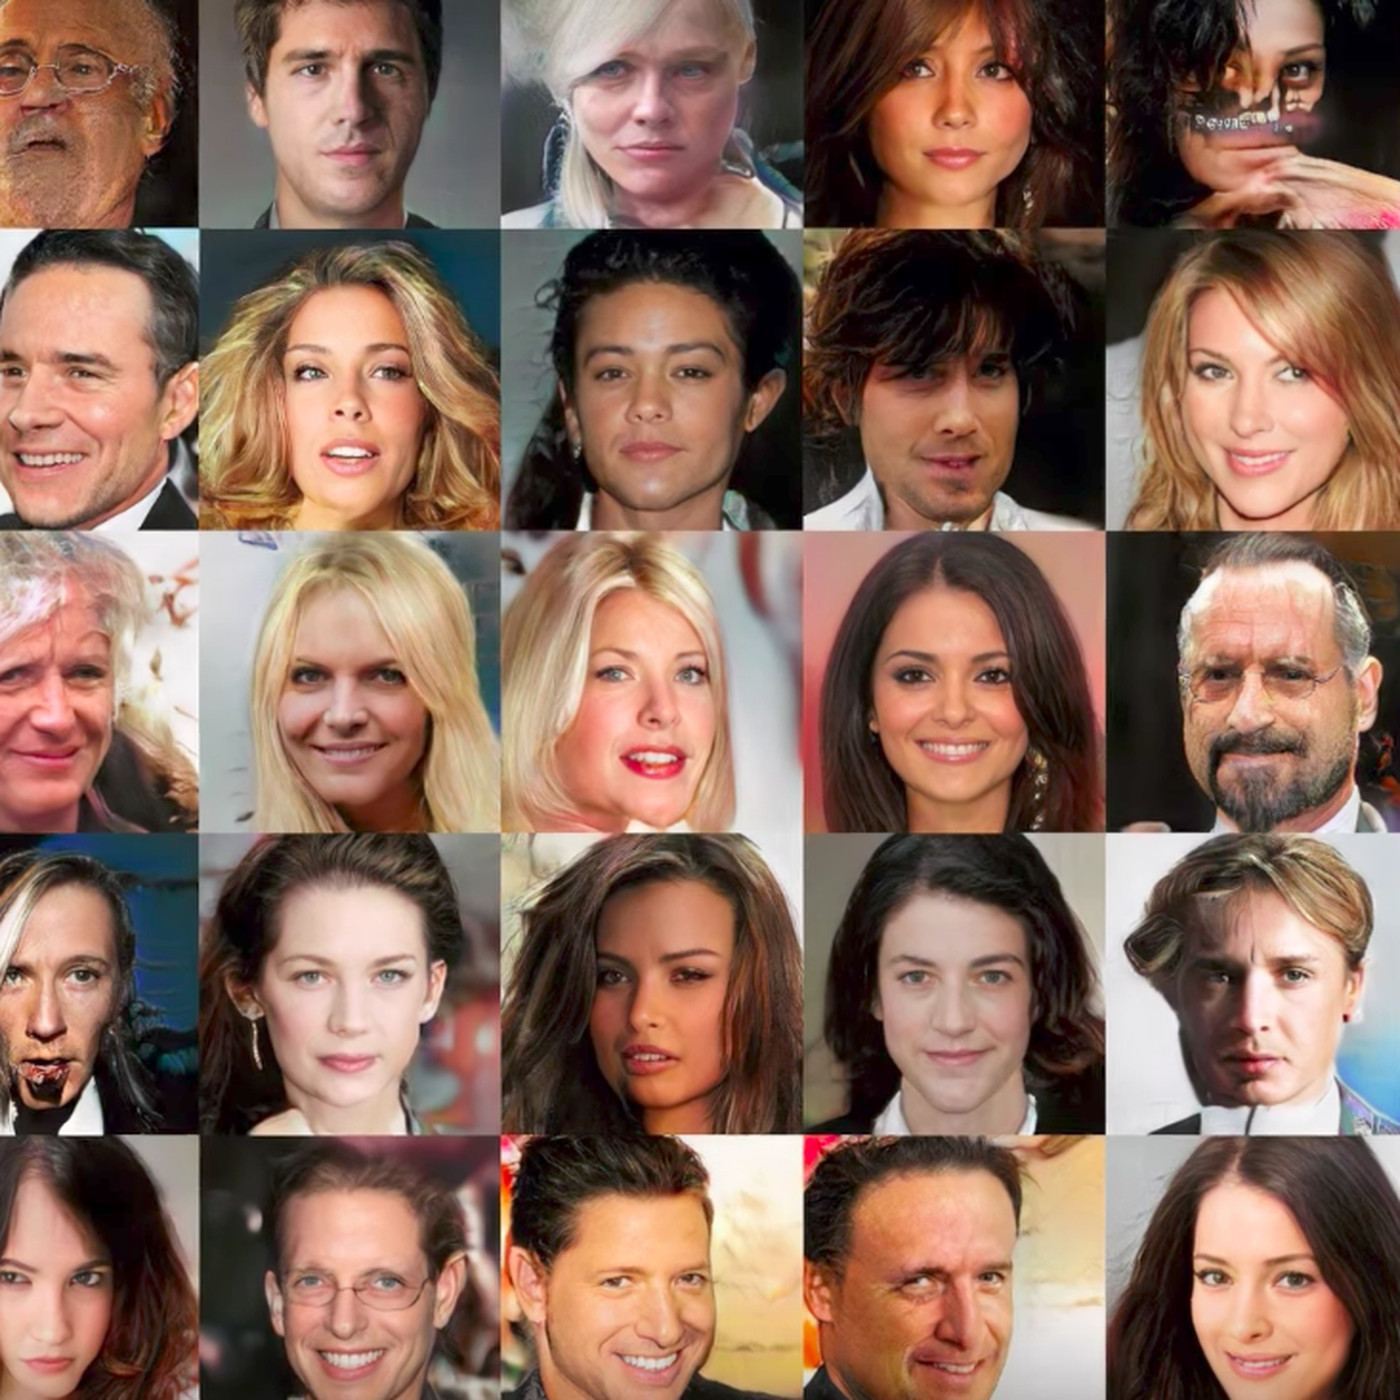

In [21]:
Image(filename='faces.jpeg')

Karras, T., Aila, T., Laine, S., & Lehtinen, J. (2017). Progressive growing of gans for improved quality, stability, and variation. arXiv preprint arXiv:1710.10196.

# Other paradigms

- Many optimization algorithms are based on how nature works. 
 - One of the preferred natural phenomenon adaptation is Darwinian evolution
   - A population of solutions is created
   - They get an evaluation value depending on how good they are on solving a task
   - The best individuals are selected to create mode solutions (which hopefully will outperform their ancestors)
   - The algorithm is repeated iteratively
 - However, many more approaches exist
   - Ant colony-based
   - Particle swarm-based
   - Bee behavior-based
   - etc.

## Genetic programming

Genetic programming falls into the category of evolutionary algorithms, where the solutions (or individuals) are defined by how good they are at performing certain task. We are going to see a glimpse of how it works.

## Exercise

Try to extract a pattern from the following number associations:

<table>
<thead>
<tr><th style="text-align: right;">  x1</th><th style="text-align: right;">  x2</th><th style="text-align: right;">  x3</th><th style="text-align: right;">  x4</th><th style="text-align: right;">  x5</th><th style="text-align: right;">  x6</th><th style="text-align: right;">  x7</th><th style="text-align: right;">  x8</th><th style="text-align: right;">  x9</th><th style="text-align: right;">  x10</th><th style="text-align: right;">  x11</th><th style="text-align: right;">  P</th></tr>
</thead>
<tbody>
<tr><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">    0</td><td style="text-align: right;">    0</td><td style="text-align: right;">  0</td></tr>
<tr><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">    0</td><td style="text-align: right;">    1</td><td style="text-align: right;">  1</td></tr>
<tr><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">    0</td><td style="text-align: right;">    1</td><td style="text-align: right;">  1</td></tr>
<tr><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">    1</td><td style="text-align: right;">    1</td><td style="text-align: right;">  1</td></tr>
<tr><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">    1</td><td style="text-align: right;">    0</td><td style="text-align: right;">  1</td></tr>
<tr><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">    0</td><td style="text-align: right;">    1</td><td style="text-align: right;">  1</td></tr>
<tr><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">    0</td><td style="text-align: right;">    0</td><td style="text-align: right;">  1</td></tr>
<tr><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">    1</td><td style="text-align: right;">    1</td><td style="text-align: right;">  1</td></tr>
<tr><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">    0</td><td style="text-align: right;">    1</td><td style="text-align: right;">  1</td></tr>
<tr><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">    0</td><td style="text-align: right;">    0</td><td style="text-align: right;">  0</td></tr>
<tr><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">    1</td><td style="text-align: right;">    1</td><td style="text-align: right;">  0</td></tr>
<tr><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">    0</td><td style="text-align: right;">    1</td><td style="text-align: right;">  0</td></tr>
<tr><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">    1</td><td style="text-align: right;">    0</td><td style="text-align: right;">  1</td></tr>
<tr><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">    1</td><td style="text-align: right;">    0</td><td style="text-align: right;">  1</td></tr>
<tr><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">    0</td><td style="text-align: right;">    0</td><td style="text-align: right;">  0</td></tr>
<tr><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">    0</td><td style="text-align: right;">    0</td><td style="text-align: right;">  0</td></tr>
<tr><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">    0</td><td style="text-align: right;">    0</td><td style="text-align: right;">  1</td></tr>
<tr><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">    1</td><td style="text-align: right;">    0</td><td style="text-align: right;">  0</td></tr>
<tr><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">    1</td><td style="text-align: right;">    1</td><td style="text-align: right;">  0</td></tr>
<tr><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">    0</td><td style="text-align: right;">    1</td><td style="text-align: right;">  0</td></tr>
</tbody>
</table>

This problem is known as the Multiplexor problem. In this case, the 3-8 Multiplexor. This problem consists of three bits pointing to a position in the remaining 8 bits. The referenced bit is the final solution.

In this instance, if we renamed the variables, the problem structure would become much more apparent:

<table>
<thead>
<tr><th style="text-align: right;">  d2</th><th style="text-align: right;">  d1</th><th style="text-align: right;">  d0</th><th style="text-align: right;">  x0</th><th style="text-align: right;">  x1</th><th style="text-align: right;">  x2</th><th style="text-align: right;">  x3</th><th style="text-align: right;">  x4</th><th style="text-align: right;">  x5</th><th style="text-align: right;">  x6</th><th style="text-align: right;">  x7</th><th style="text-align: right;">  P</th></tr>
</thead>
<tbody>
<tr><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">    0</td><td style="text-align: right;">    0</td><td style="text-align: right;">  0</td></tr>
<tr><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">    0</td><td style="text-align: right;">    1</td><td style="text-align: right;">  1</td></tr>
<tr><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">    0</td><td style="text-align: right;">    1</td><td style="text-align: right;">  1</td></tr>
<tr><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">    1</td><td style="text-align: right;">    1</td><td style="text-align: right;">  1</td></tr>
<tr><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">    1</td><td style="text-align: right;">    0</td><td style="text-align: right;">  1</td></tr>
<tr><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">    0</td><td style="text-align: right;">    1</td><td style="text-align: right;">  1</td></tr>
<tr><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">    0</td><td style="text-align: right;">    0</td><td style="text-align: right;">  1</td></tr>
<tr><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">    1</td><td style="text-align: right;">    1</td><td style="text-align: right;">  1</td></tr>
<tr><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">    0</td><td style="text-align: right;">    1</td><td style="text-align: right;">  1</td></tr>
<tr><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">    0</td><td style="text-align: right;">    0</td><td style="text-align: right;">  0</td></tr>
<tr><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">    1</td><td style="text-align: right;">    1</td><td style="text-align: right;">  0</td></tr>
<tr><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">    0</td><td style="text-align: right;">    1</td><td style="text-align: right;">  0</td></tr>
<tr><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">    1</td><td style="text-align: right;">    0</td><td style="text-align: right;">  1</td></tr>
<tr><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">    1</td><td style="text-align: right;">    0</td><td style="text-align: right;">  1</td></tr>
<tr><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">    0</td><td style="text-align: right;">    0</td><td style="text-align: right;">  0</td></tr>
<tr><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">    0</td><td style="text-align: right;">    0</td><td style="text-align: right;">  0</td></tr>
<tr><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">    0</td><td style="text-align: right;">    0</td><td style="text-align: right;">  1</td></tr>
<tr><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">    1</td><td style="text-align: right;">    0</td><td style="text-align: right;">  0</td></tr>
<tr><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">    1</td><td style="text-align: right;">    1</td><td style="text-align: right;">  0</td></tr>
<tr><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">    0</td><td style="text-align: right;">    1</td><td style="text-align: right;">  0</td></tr>
</tbody>
</table>

This is a difficult problem for a ML algorithm if we don't provide the extra information about the structure.
We are going to try to create an estimator which is able to *learn* the 3-8 Multiplexor problem.

### Problem definition:

- We are going to create solutions for the 3-8 Mux problem
- The solutions will have a tree structure
- The trees will be composed of basic programming operators
- The solutions will be evaluated by the number of correct predictions

The code of the following cell has been borrowed from https://github.com/DEAP/deap/blob/99223a884d224cfc0f5cdf779e18d4eae030e788/examples/gp/multiplexer.py

## Think

Before running the evolutionary algorithm,

- What are we searching for; solutions with high score, or low score?
- What is the maximum score a solution to the problem can achieve?

In [6]:
#    This file is part of EAP.
#
#    EAP is free software: you can redistribute it and/or modify
#    it under the terms of the GNU Lesser General Public License as
#    published by the Free Software Foundation, either version 3 of
#    the License, or (at your option) any later version.
#
#    EAP is distributed in the hope that it will be useful,
#    but WITHOUT ANY WARRANTY; without even the implied warranty of
#    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the
#    GNU Lesser General Public License for more details.
#
#    You should have received a copy of the GNU Lesser General Public
#    License along with EAP. If not, see <http://www.gnu.org/licenses/>.



import random
import operator

import numpy

from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp

def if_then_else(condition, out1, out2):
    return out1 if condition else out2

# Initialize Multiplexer problem input and output vectors

MUX_SELECT_LINES = 3
MUX_IN_LINES = 2 ** MUX_SELECT_LINES
MUX_TOTAL_LINES = MUX_SELECT_LINES + MUX_IN_LINES

# input : [A0 A1 A2 D0 D1 D2 D3 D4 D5 D6 D7] for a 8-3 mux
inputs = [[0] * MUX_TOTAL_LINES for i in range(2 ** MUX_TOTAL_LINES)]
outputs = [None] * (2 ** MUX_TOTAL_LINES)

for i in range(2 ** MUX_TOTAL_LINES):
    value = i
    divisor = 2 ** MUX_TOTAL_LINES
    # Fill the input bits
    for j in range(MUX_TOTAL_LINES):
        divisor /= 2
        if value >= divisor:
            inputs[i][j] = 1
            value -= divisor
    
    # Determine the corresponding output
    indexOutput = MUX_SELECT_LINES
    for j, k in enumerate(inputs[i][:MUX_SELECT_LINES]):
        indexOutput += k * 2**j
    outputs[i] = inputs[i][indexOutput]

pset = gp.PrimitiveSet("MAIN", MUX_TOTAL_LINES, "IN")

# We add the operations and terminals

pset.addPrimitive(operator.and_, 2)
pset.addPrimitive(operator.or_, 2)
pset.addPrimitive(operator.not_, 1)
pset.addPrimitive(if_then_else, 3)
pset.addTerminal(1)
pset.addTerminal(0)

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("expr", gp.genFull, pset=pset, min_=2, max_=4)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

def evalMultiplexer(individual):
    func = toolbox.compile(expr=individual)
    return sum(func(*in_) == out for in_, out in zip(inputs, outputs)),

toolbox.register("evaluate", evalMultiplexer)
toolbox.register("select", tools.selTournament, tournsize=7)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genGrow, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

def main():
#    random.seed(10)
    pop = toolbox.population(n=40)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    
    algorithms.eaSimple(pop, toolbox, 0.8, 0.1, 100, stats, halloffame=hof)
    
    return pop, stats, hof

if __name__ == "__main__":
    main()



gen	nevals	avg 	std    	min	max 
0  	40    	1041	84.4073	896	1184
1  	34    	1117.6	77.4638	896	1216
2  	31    	1168.8	44.9284	1024	1256
3  	38    	1183.8	72.6964	896 	1296
4  	33    	1215.2	38.6906	1120	1280
5  	35    	1205.6	62.0245	1024	1280
6  	32    	1213.4	67.8678	1024	1280
7  	34    	1228.4	56.8774	1024	1312
8  	33    	1232.4	60.5561	1024	1280
9  	34    	1230.6	59.002 	1024	1280
10 	28    	1244  	61.6312	1024	1280
11 	35    	1225.2	68.6219	1024	1296
12 	38    	1219.2	74.4645	1024	1312
13 	28    	1258.4	65.5366	1024	1328
14 	37    	1260.4	50.7842	1136	1328
15 	36    	1268.4	57.0179	1088	1328
16 	33    	1269.2	55.3549	1152	1328
17 	30    	1279.4	48.8061	1152	1328
18 	29    	1290.4	60.351 	1024	1328
19 	31    	1274.2	65.6046	1104	1360
20 	33    	1315.4	39.472 	1200	1360
21 	31    	1320  	59.0051	1104	1360
22 	34    	1295.2	71.4826	1088	1376
23 	35    	1322.8	51.1484	1152	1376
24 	34    	1305.4	60.9495	1152	1376
25 	36    	1317.8	54.4937	1152	1376
26 	35    	1304.4	85.9572	960 	1376

## Exercise

- What score did you obtain? Do you consider it to be good? Why?
- Change the number of generations so that the algorithm has a better chance of discovering improved solutions.

- Did the results improve? Why?
- Can you identify any pattern in the evolution of the column showing the best results?